# Properties of the dataset

### Import Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import json
import torch
import torch.nn as nn
import torch.nn.functional as F

### Load data

In [11]:
#load data from rocstories
cwd = os.getcwd()
dataset = 'train'
rocpath = f'{cwd}/datasets/ROCstory/roc_{dataset}.json'
storylist = []
emotionlist_orig = []
# read in json file
with open(rocpath, 'r') as roc_reader:
    for story in roc_reader:
        story = json.loads(story)[0].strip()
        storylist.append(story)

# load the emotion labels
emotionpath = f'{cwd}/datasets/ROCstory/roc_{dataset}_emotion_split_False_scores.json'
with open(emotionpath, 'r') as emotion_reader:
    for emotion in emotion_reader:
        emotion = json.loads(emotion)
        emotionlist_orig.append(emotion)
print(f'{len(storylist)} stories loaded')
print(f'{len(emotionlist_orig)} emotions loaded')
print(f'{storylist[:2]}')

93161 stories loaded
93161 emotions loaded
['Brad had trained for the sprint. Brad was nervous. Today was the race. Brad ran the race. He got first place.', 'Connie loved going to the movies. She also enjoyed her high school art class. Connie wanted a job that combined the things she loved. Connie majored in art in college. After college she got a job designing posters for movies.']


#### General properties

In [12]:
# convert emotionlist to torch tensor
emotionlist_orig = torch.Tensor(emotionlist_orig)
print(f'{emotionlist_orig.shape}')
print(f'{emotionlist_orig[:2]}')
emotionlist= emotionlist_orig.permute(1,0)
print(f'{emotionlist.shape}')
print(f'{emotionlist}')

torch.Size([93161, 4])
tensor([[0.0455, 0.4557, 0.4294, 0.0695],
        [0.0130, 0.8972, 0.0621, 0.0278]])
torch.Size([4, 93161])
tensor([[0.0455, 0.0130, 0.0620,  ..., 0.0363, 0.0454, 0.0493],
        [0.4557, 0.8972, 0.6437,  ..., 0.7996, 0.4141, 0.7680],
        [0.4294, 0.0621, 0.0769,  ..., 0.1128, 0.4353, 0.1503],
        [0.0695, 0.0278, 0.2174,  ..., 0.0513, 0.1052, 0.0325]])


In [13]:
# emotion labels are
labels= ['anger', 'joy', 'optimism', 'sadness']

## Distribution

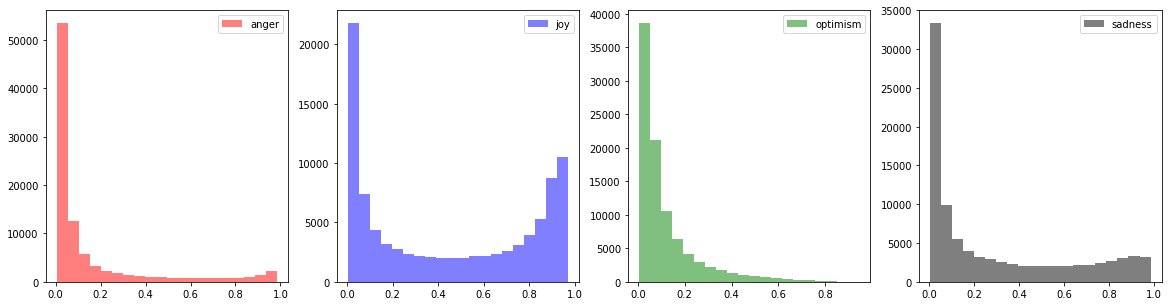

In [14]:
anger = emotionlist[0]
joy = emotionlist[1]
optimism = emotionlist[2]
sadness = emotionlist[3]
# diplay the distribution of each emotion with matplotlib in individual subplots
fig, axs = plt.subplots(1, 4, figsize=(20,5))
axs[0].hist(anger, bins=20, color='red', alpha=0.5, label='anger')
axs[0].legend()
axs[1].hist(joy, bins=20, color='blue', alpha=0.5, label='joy')
axs[1].legend()
axs[2].hist(optimism, bins=20, color='green', alpha=0.5, label='optimism')
axs[2].legend()
axs[3].hist(sadness, bins=20, color='black', alpha=0.5, label='sadness')
axs[3].legend()
plt.show()

In [15]:
# t-SNE visualization of the emotionlist_orig
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# tsne = TSNE(n_components=2, random_state=0)
# tsne_emotionlist = tsne.fit_transform(emotionlist_orig)
# print(f'{tsne_emotionlist.shape}')
# print(f'{tsne_emotionlist[:2]}')
# # plot the t-SNE visualization
# plt.scatter(tsne_emotionlist[:,0], tsne_emotionlist[:,1], c=emotionlist_orig)
# plt.legend(labels)
# plt.show()


In [22]:
# pick random seed for reproducibility
seed = 42
# load the emotion labels
pathtorandemos = f'{cwd}/datasets/ROCstory/roc_{dataset}_emotion_split_True_scores.json'
rand_emotionlist_orig = []
with open(pathtorandemos, 'r') as rr:
    for emotion in rr:
        emotion = json.loads(emotion)
        rand_emotionlist_orig.append(emotion)
# print the first two emotions
print(f'{rand_emotionlist_orig[:2]}')

[[0.11232228577136993, 0.3019600510597229, 0.4512033760547638, 0.13451427221298218], [0.059843190014362335, 0.04509861394762993, 0.07209575921297073, 0.8229624032974243]]


In [25]:
rand_indices = np.random.randint(0, len(rand_emotionlist_orig)-1, 1024)
rand_emotionlist_1024 = [rand_emotionlist_orig[i] for i in rand_indices]
#write the random emotions to a json file
with open(f'{cwd}/datasets/ROCstory/target_emotion_scores_{len(rand_indices)}.json', 'w') as rand_writer:
    for emotion in rand_emotionlist_1024:
        json.dump(emotion, rand_writer)
        rand_writer.write('\n')
# do the same for 64 emotions
rand_indices = np.random.randint(0, len(rand_emotionlist_orig)-1, 64)
rand_emotionlist_64 = [rand_emotionlist_orig[i] for i in rand_indices]
with open(f'{cwd}/datasets/ROCstory/target_emotion_scores_{len(rand_indices)}.json', 'w') as rand_writer:
    for emotion in rand_emotionlist_64:
        json.dump(emotion, rand_writer)
        rand_writer.write('\n')